<a href="https://colab.research.google.com/github/B-MEbrahim/DL/blob/main/House%20prices/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

In [3]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
mean = train_data.mean(axis=0)
train_data -=  mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [9]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [15]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []
for i in range(k):
  print(f'Fold {i}')
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_target = train_labels[i * num_val_samples : (i + 1) * num_val_samples]
  partial_train_data = np.concatenate((
      train_data[: i * num_val_samples],
      train_data[(i + 1) * num_val_samples:]
  ), axis=0)
  partial_train_labels = np.concatenate((
      train_labels[:i * num_val_samples],
      train_labels[(i + 1) * num_val_samples:]
  ), axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_labels,
            epochs=num_epochs, batch_size=16, verbose=0, validation_data=(val_data, val_target))
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Fold 0
Fold 1
Fold 2
Fold 3


In [17]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

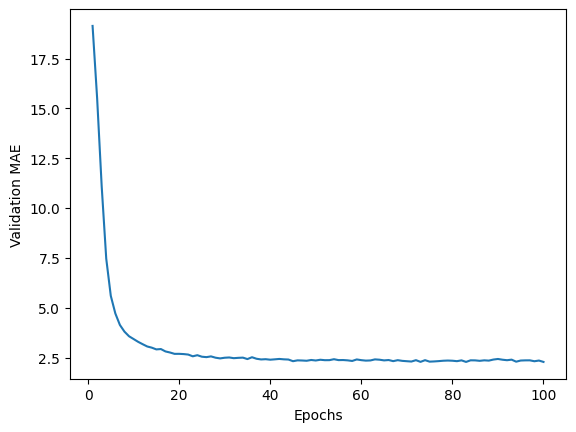

In [19]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [21]:
model = build_model()
model.fit(train_data, train_labels,
          epochs=130, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.6802 - mae: 2.2541
